# Solving Wordle using Regex.

In [13]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [14]:
valid_solutions_df = pd.read_csv('./data/processed/valid_solutions.csv')
valid_solutions_df

,word
0,aback
1,abase
2,abate
3,abbey
4,abbot
...,...
2310,young
2311,youth
2312,zebra
2313,zesty


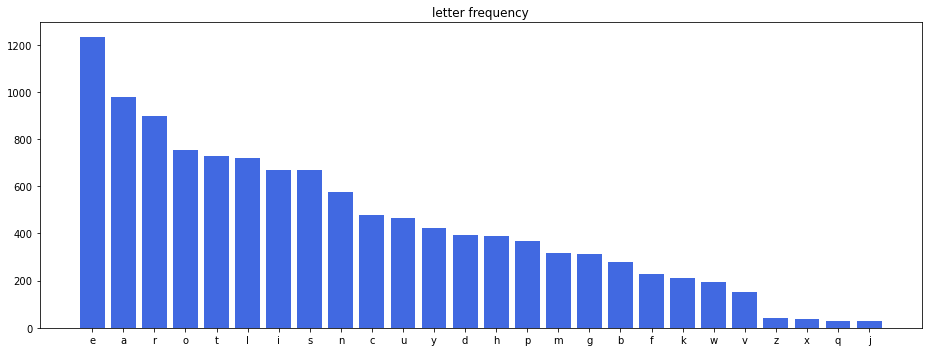

In [11]:
words = valid_solutions_df['word'].to_list()

letters = [letter for word in list(words) for letter in word]

count = Counter(letters)
plt.rc("figure", autolayout=True, figsize=(13, 5))
ax = plt.bar(*zip(*count.most_common()), color='royalblue')
plt.title("letter frequency");

We'll start with a guess by combining letters according to their letter frequencies that we have calculated in the above graph. We also know from the Heatmap for letter vs position that the most common starting letter is S, and from the above graph the most common letters overall are EAROT. We can use a regular expression to find words with those letters. If we failed te get any green or yellow letters then we move to the next 5 most frequent letters.

To spread out the information provided by the original guess, we'll start with a  word which has five distinct letters from the list of matching words.

Then we compare the selected word with input word. For the grey letter words we are representing it with a 0, yellow letters with 1 and green letters with 2.

After that, we will again generate regex pattern using the above information of color of letters. If a letter is grey letter i.e 0 in our case, then we are negating that letter and similarly for yellow letter we are negating the yellow letter only at that position and later filtering the words that contain yellow letter at different positions.

We will keep on repeating the above step until we find a perfect match. i.e. [2,2,2,2,2].

In [5]:
from collections import Counter
import random

# var freq = list of letter freq club 5

freq = ["earot", "alinc", "uydhp", "mgbfk", "wvzxqj"]

def isUniqueChars(string):

    # Counting frequency
    freq = Counter(string)

    if(len(freq) == len(string)):
        return True
    else:
        return False

def regex_wordle(input_word):
    count = 0
    flag = False
    i = 0
    listFlag=False
    while flag == False:
        if count == 0:
            pattern = r's['+ freq[i] +']{4}' # initial pattern starting letter S
        else:
            pattern = r'['+ freq[i] +']{5}' # select next from the freq

        matching_words = valid_solutions_df.loc[valid_solutions_df['word'].str.match(pattern)]
        matching_words = matching_words.values.tolist()

        shortlisted_words = []
        for x in matching_words:
            if isUniqueChars(x[0]):
                shortlisted_words.append(x[0])


        index = 0
        print(shortlisted_words)
        print(pattern)
        if len(shortlisted_words) != 0:
            selected = shortlisted_words[index]
            result_list = []
            for x in range(5):
                if selected[x] == input_word[x]:
                    result_list.append(2)
                elif selected[x] in input_word:
                    result_list.append(1)
                else:
                    result_list.append(0)

            if sum(result_list) == 0:
                print("")
                # pick next 5 letters from freq


            else:
                attempt=1;
                no_letters = "" # keep appending grey letters

                yellow_letters = {}
                while sum(result_list) != 10:
                    cnt = 0
                    print("attempt: "+ str(attempt))
                    stri = ["", "", "", "", ""]
                    green_letters = {}

                    grey_letters = {}
                    if listFlag:
                        for x in range(5):

                            if selected[x] == input_word[x]:
                                result_list.append(2)
                            elif selected[x] in input_word:
                                result_list.append(1)
                            else:
                                result_list.append(0)
                    print("Selected Word: "+str(selected))
                    print("Result: "+str(result_list))
                    for x in result_list:

                        if x == 2:
                            green_letters[cnt] = selected[cnt]
                        elif x == 1:

                            yellow_letters[cnt] = selected[cnt]

                        elif x == 0:
                            grey_letters[cnt] = selected[cnt]
                            no_letters += selected[cnt]

                        cnt += 1

                    for i in range(0, 5):
                        if i in green_letters.keys():
                            stri[i] = green_letters[i]
                        elif i in yellow_letters.keys():
                            stri[i] = "^" + yellow_letters[i] + no_letters # + prev_word
                        else:
                            stri[i] = "^" + no_letters

                    pattern = r'[' + stri[0] + ']' + '[' + stri[1] + ']' + '[' + stri[2] + ']' + '[' + stri[3] + ']' + '[' + stri[4] + ']'
                    print("Pattern Generated: "+ str(pattern))
                    matching_words = valid_solutions_df.loc[valid_solutions_df['word'].str.match(pattern)]
                    final_list = []

                    for word in matching_words.values.tolist():
                        if len(yellow_letters) == 0:
                            final_list = [x[0] for x in matching_words.values.tolist()]

                        for key, value in yellow_letters.items():
                            if value in word[0]:

                                final_list.append(word[0])

                    selected = final_list[0]
                    listFlag=True
                    attempt+=1
                    if sum(result_list)==10:
                        print("Word Found: "+str(selected))
                        return attempt
                        break
                    result_list=[]





        if i == len(freq) - 1:
            flag = True
        count += 1
        i += 1


In [6]:
print(regex_wordle("crave"))

['stare', 'store']
s[earot]{4}
attempt: 1
Selected Word: stare
Result: [0, 0, 2, 1, 2]
Pattern Generated: [^st][^st][a][^rst][e]
attempt: 2
Selected Word: brace
Result: [0, 2, 2, 1, 2]
Pattern Generated: [^stb][r][a][^cstb][e]
attempt: 3
Selected Word: crane
Result: [2, 2, 2, 0, 2]
Pattern Generated: [c][r][a][^cstbn][e]
attempt: 4
Selected Word: crave
Result: [2, 2, 2, 2, 2]
Pattern Generated: [c][r][a][v][e]
Word Found: crave
5


Here, we are calculating average attempts taken by the above algorithm for one thousand words.

In [7]:
total_attempts=0
words_used=0
for i in valid_solutions_df.values.tolist()[:1000]:
    for j in i:
        if regex_wordle(j) is not None:
            words_used+=1
            total_attempts+=regex_wordle(j)-1

total_attempts

['stare', 'store']
s[earot]{4}
attempt: 1
Selected Word: stare
Result: [0, 0, 2, 0, 0]
Pattern Generated: [^stre][^stre][a][^stre][^stre]
attempt: 2
Selected Word: aback
Result: [2, 2, 2, 2, 2]
Pattern Generated: [a][b][a][c][k]
Word Found: aback
['stare', 'store']
s[earot]{4}
attempt: 1
Selected Word: stare
Result: [0, 0, 2, 0, 0]
Pattern Generated: [^stre][^stre][a][^stre][^stre]
attempt: 2
Selected Word: aback
Result: [2, 2, 2, 2, 2]
Pattern Generated: [a][b][a][c][k]
Word Found: aback
['stare', 'store']
s[earot]{4}
attempt: 1
Selected Word: stare
Result: [1, 0, 2, 0, 2]
Pattern Generated: [^str][^tr][a][^tr][e]
attempt: 2
Selected Word: abase
Result: [2, 2, 2, 2, 2]
Pattern Generated: [a][b][a][s][e]
Word Found: abase
['stare', 'store']
s[earot]{4}
attempt: 1
Selected Word: stare
Result: [1, 0, 2, 0, 2]
Pattern Generated: [^str][^tr][a][^tr][e]
attempt: 2
Selected Word: abase
Result: [2, 2, 2, 2, 2]
Pattern Generated: [a][b][a][s][e]
Word Found: abase
['stare', 'store']
s[earot]{4}

3596

In [8]:
words_used

879

As, we can see for the 1000 words we got perfect match for 879 words and the total attempts taken is 3596.
So the average attempts will be 4.09